In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell

import warnings
warnings.filterwarnings('ignore')

In [8]:
TCS = yf.download('TCS', '2023-10-10', '2024-02-15')

[*********************100%%**********************]  1 of 1 completed


In [12]:
TCS['mean'] = TCS['Adj Close'].ewm(span=30).mean()
TCS['std'] = TCS['Adj Close'].ewm(span=30).std()

In [13]:
TCS['bb_up'] = TCS['mean'] + 1 * TCS['std']
TCS['bb_down'] = TCS['mean'] - 1 * TCS['std']

long = TCS['Adj Close'] <= TCS['bb_down']
short = TCS['Adj Close'] >= TCS['bb_up']

#Net Position
TCS['position'] = np.nan
TCS.loc[long, 'position'] = 1
TCS.loc[short, 'position'] = -1

TCS['position'].fillna (inplace=True, method="ffill")

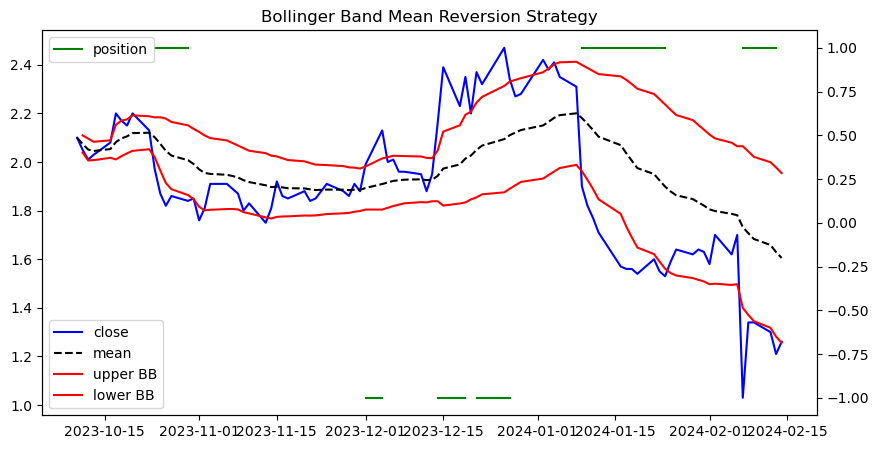

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(TCS['Adj Close'], label='close', color='blue')
ax1.plot(TCS['mean'], label='mean', color='black', linestyle='--')
ax1.plot(TCS['bb_up'], label='upper BB', color='red')
ax1.plot(TCS['bb_down'], label='lower BB', color='red')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(TCS['position'], label='position', color='green')
ax2.legend()
plt.title("Bollinger Band Mean Reversion Strategy")
plt.show()

In [22]:
TCS['log_returns'] = np.log(TCS['Adj Close'] / TCS['Adj Close'].shift(1))
TCS['strategy_returns'] = TCS['log_returns'] * TCS['position'].shift(1)

                    Strategy
------------------  ----------
Start Period        2023-10-18
End Period          2024-02-14
Risk-Free Rate      1.0%
Time in Market      95.0%

Cumulative Return   6.68%
CAGR﹪              14.68%

Sharpe              0.89
Prob. Sharpe Ratio  61.57%
Sortino             1.6
Sortino/√2          1.13
Omega               1.18

Max Drawdown        -20.05%
Longest DD Days     65

Gain/Pain Ratio     0.18
Gain/Pain (1M)      0.85

Payoff Ratio        1.11
Profit Factor       1.18
Common Sense Ratio  1.05
CPC Index           0.67
Tail Ratio          0.89
Outlier Win Ratio   4.49
Outlier Loss Ratio  2.22

MTD                 18.3%
3M                  5.82%
6M                  6.68%
YTD                 2.37%
1Y                  6.68%
3Y (ann.)           14.68%
5Y (ann.)           14.68%
10Y (ann.)          14.68%
All-time (ann.)     14.68%

Avg. Drawdown       -13.79%
Avg. Drawdown Days  28
Recovery Factor     0.65
Ulcer Index         0.1
Serenity Index      0.4


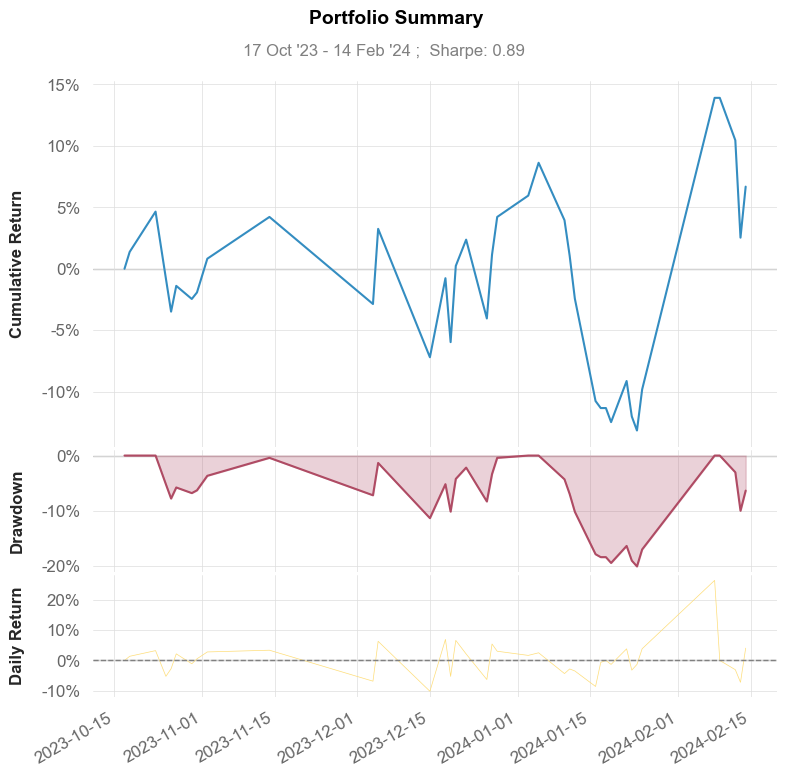

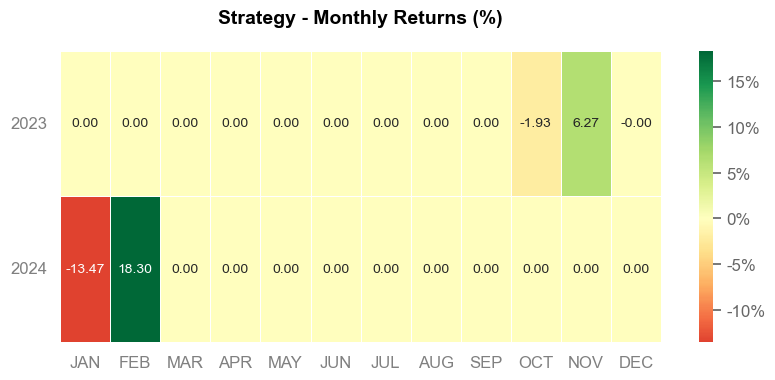

In [23]:
import quantstats as qs
qs.reports.basic(TCS['strategy_returns'], rf=0.01)